In [51]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import SGDClassifier
import matplotlib.pyplot as plt
from matplotlib.pylab import rc, plot
import seaborn as sns
import itertools
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, roc_curve, matthews_corrcoef


**Классификация**

Загрузим данные

In [52]:
 mnist = fetch_openml('mnist_784', version=1)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Задача: опозновать пятерки

In [53]:
def plot_confusion_matrix(cm, title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)


    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

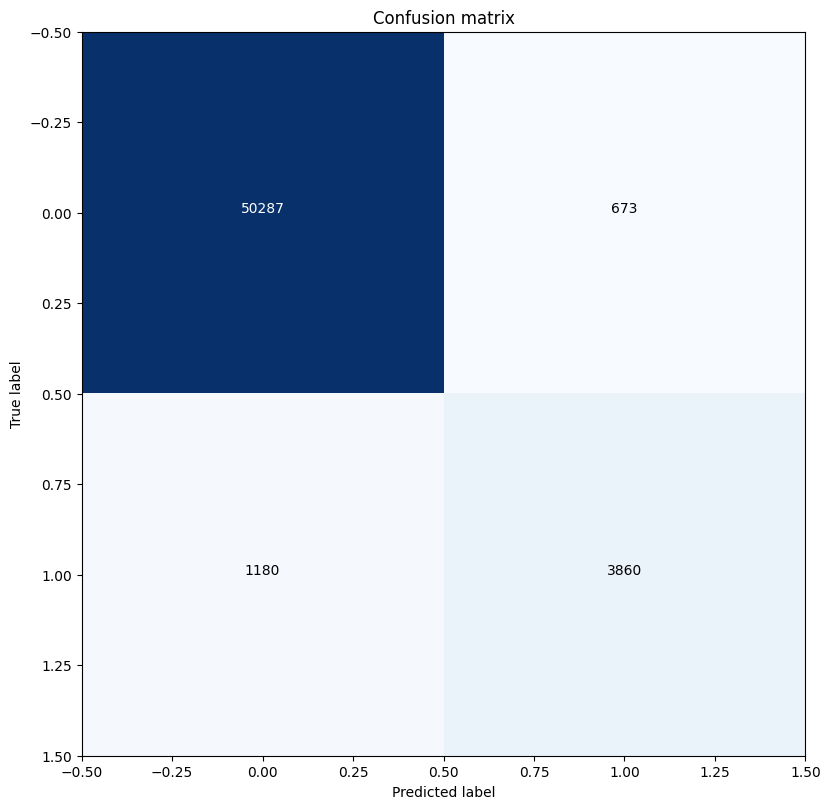

In [54]:
X, y = mnist["data"], mnist["target"]
y = y.astype(np.uint8)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train_5 = (y_train == 5) # True для всех пятерок, False для всех остальных цифр
y_test_5 = (y_test == 5)
sgd_clf = SGDClassifier(random_state=42) # классификатор на основе метода стохастического градиентного спуска (англ. Stochastic Gradient Descent SGD)
sgd_clf.fit(X_train, y_train_5) # обучаем классификатор распозновать пятерки на целом обучающем наборе

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
mtrx = confusion_matrix(y_train_5, y_train_pred)

plt.figure(figsize=(10, 8))
plot_confusion_matrix(mtrx, title='Confusion matrix')

In [55]:
tn, fp, fn, tp = mtrx.ravel()

print(f"Accuracy: {accuracy_score(y_train_5, y_train_pred)}")
print(f"Recall: {recall_score(y_train_5, y_train_pred)}")
print(f"Precision: {f1_score(y_train_5, y_train_pred)}")
print(f"F1-мера: {f1_score(y_train_5, y_train_pred)}")
print(f"ROC-AUC: {roc_auc_score(y_train_5, y_train_pred)}")
print(f"MCC: {matthews_corrcoef(y_train_5, y_train_pred)}")
print(f"Fall-out: {fp / (fp + tn)}")

Accuracy: 0.9669107142857143
Recall: 0.7658730158730159
Precision: 0.8064347644416588
F1-мера: 0.8064347644416588
ROC-AUC: 0.8763332897261469
MCC: 0.7897239768923343
Fall-out: 0.013206436420722134


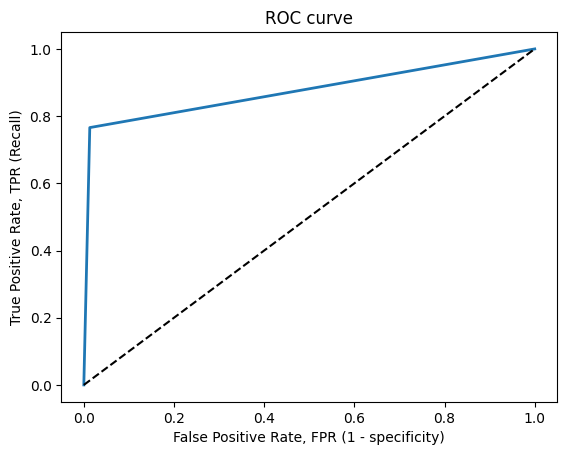

In [56]:
fpr, tpr, thresholds = roc_curve(y_train_5, y_train_pred)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # diagonal
    plt.xlabel('False Positive Rate, FPR (1 - specificity)')
    plt.ylabel('True Positive Rate, TPR (Recall)')
    plt.title('ROC curve')
    plt.savefig("ROC.png")
plot_roc_curve(fpr, tpr)
plt.show()

**Регрессия**

In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.datasets import fetch_california_housing # dataset

In [58]:
california = fetch_california_housing()
X = pd.DataFrame(california.data, columns=california.feature_names)
y = california.target

In [59]:
# разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
# обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

# прогнозирование на тестовой выборке
y_pred = model.predict(X_test)

In [61]:
# подсчёт метрик качества
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# расчет скорректированного R²
n = X_test.shape[0]  # кол-вл наблюдений
k = X_test.shape[1]  # кол-во признаков
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)

In [62]:
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'R-squared (R²): {r2:.2f}')
print(f'Adjusted R-squared (Adj R²): {adj_r2:.2f}')

Mean Squared Error (MSE): 0.56
Root Mean Squared Error (RMSE): 0.75
Mean Absolute Error (MAE): 0.53
R-squared (R²): 0.58
Adjusted R-squared (Adj R²): 0.57


**Кластеризация**

In [63]:
import pandas as pd
from sklearn import datasets, metrics
from sklearn.cluster import KMeans, SpectralClustering

In [64]:
data = datasets.load_digits() # датасет с цифрами
X, y = data.data, data.target

# исользование двух алгоритмов для сравнения
algorithms = []
algorithms.append(KMeans(n_clusters=10, random_state=1))
algorithms.append(
    SpectralClustering(n_clusters=10, random_state=1, affinity="nearest_neighbors")
)

In [65]:
data = []

# подсчёт метрик для обоих алгоритмов
for algo in algorithms:
    algo.fit(X)
    data.append(
      (
          {
              "RI":metrics.rand_score(y, algo.labels_),
              "ARI": metrics.adjusted_rand_score(y, algo.labels_),
              "Silhouette": metrics.silhouette_score(X, algo.labels_),
              "Fowlkes_mallows": metrics.fowlkes_mallows_score(y, algo.labels_),
              "Calinski_harabasz": metrics.calinski_harabasz_score(X, algo.labels_),
          }
      )
  )

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [66]:
# Более красивый вывод
results = pd.DataFrame(
    data=data,
    columns=[ "RI", "ARI", "Silhouette", "Fowlkes_mallows", "Calinski_harabasz"],
    index=["K-means", "Spectral"],
)

results

,RI,ARI,Silhouette,Fowlkes_mallows,Calinski_harabasz
K-means,0.939180,0.667179,0.182247,0.701178,169.342656
Spectral,0.952341,0.756461,0.182729,0.786419,157.827069
